# Game Group Analysis
This notebook contains an analysis of various people within our board game group. They are listed below by username.

Using their stats/catalog on BGG we can see what games different people enjoy, and find potential matches for game preferences!

In [10]:
from utils import *
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np

users = ['mrjoeboo123',
        'Schwingzilla',
        'ngeagan',
        'Wellsroderick',
        'withouthavingseen']

Collecting the data is pretty simple since we can just grab the entire account data using the BGG API

In [2]:
collections = {}
for user in users:
    collections[user] = getCollection(user)

c:\Users\joeya\AppData\Local\Programs\Python\Python37\lib\site-packages\bs4\builder\__init__.py:546: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  XMLParsedAsHTMLWarning.MESSAGE, XMLParsedAsHTMLWarning


In [3]:
for user in users:
    print(f"{user} has {len(collections[user]):d} games listed on their account")

mrjoeboo123 has 110 games listed on their account
Schwingzilla has 271 games listed on their account
ngeagan has 582 games listed on their account
Wellsroderick has 260 games listed on their account
withouthavingseen has 138 games listed on their account


# User Game Breakdown
Games are listed mainly under 4 options 
- owned
- previously owned
- want (want in trade, buy, etc.)
- wishlist

In [4]:
headers = ['user','own','previosuly owned','want','wish','total']
status = []
for user in users:
    own = 0
    prev = 0
    want = 0
    wish = 0
    total = len(collections[user])
    for game in collections[user]:
        if game.own == 1: own += 1
        if game.prevowned == 1: prev += 1
        if game.want == 1: want += 1
        if game.wish != 0: wish += 1
    status.append([user, own, prev, want, wish, total])

print(tabulate(status, headers=headers, tablefmt="grid"))

+-------------------+-------+--------------------+--------+--------+---------+
| user              |   own |   previosuly owned |   want |   wish |   total |
+===================+=======+====================+========+========+=========+
| mrjoeboo123       |    83 |                  9 |      0 |     17 |     110 |
+-------------------+-------+--------------------+--------+--------+---------+
| Schwingzilla      |     0 |                  0 |      0 |      0 |     271 |
+-------------------+-------+--------------------+--------+--------+---------+
| ngeagan           |   174 |                106 |      0 |    152 |     582 |
+-------------------+-------+--------------------+--------+--------+---------+
| Wellsroderick     |   153 |                  2 |      0 |     91 |     260 |
+-------------------+-------+--------------------+--------+--------+---------+
| withouthavingseen |   115 |                  0 |      0 |      4 |     138 |
+-------------------+-------+--------------------+--

Unfortunetely not everyone has marked ratings for the various games they play. But we can take what data we do have and show that here

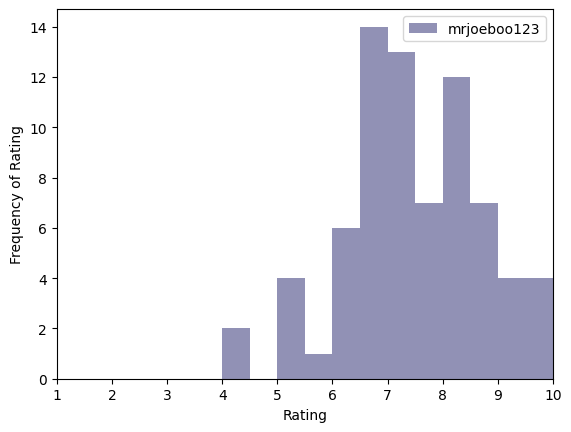

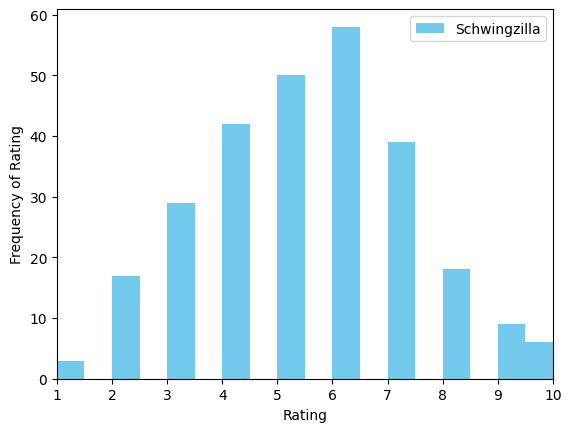

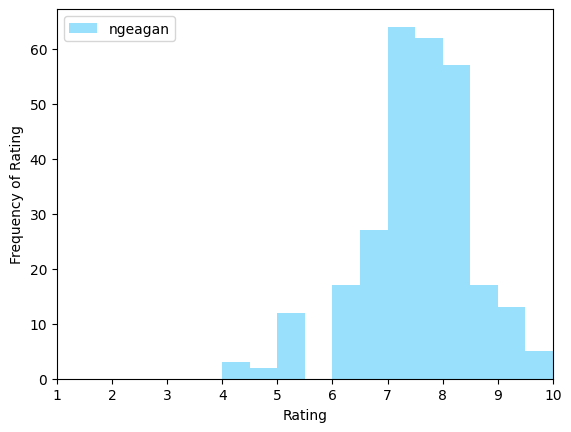

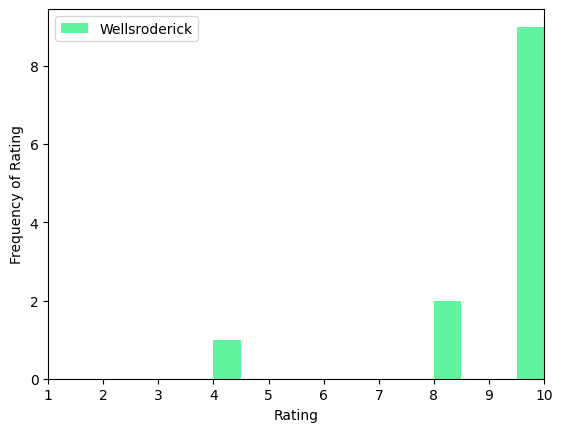

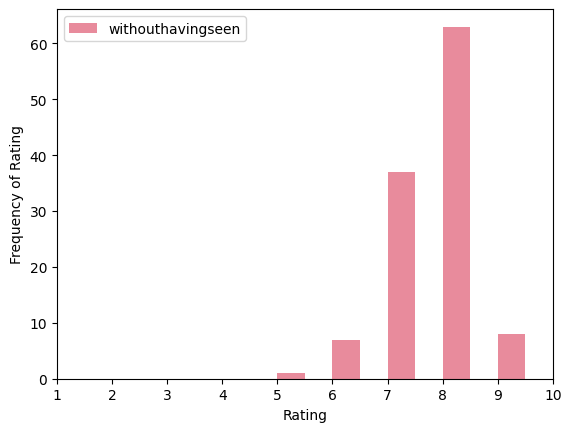

In [11]:
all_ratings = []
colors = []
binwidth = 0.5
bins=np.arange(1, 10 + binwidth, binwidth)
for user in users:
    ratings = []
    color = generate_random_hex_color()
    for game in collections[user]:
        if game.myrating != None:
            ratings.append(game.myrating)

    all_ratings.append(ratings)
    colors.append(color)
    plt.hist(ratings, bins=bins, label=user, color=color)
    plt.legend()
    plt.xlabel('Rating')
    plt.ylabel('Frequency of Rating')
    plt.xlim(1,10)
    plt.show()


# Finding Common Interests
In this section, we will take the collections and find where people overlap (if at all)

In [26]:
minRating = 8
matches = {}
for i in range(len(users)-1):
    for j in range(i+1, len(users)):
        for g1 in collections[users[i]]:
            if g1.myrating == None: continue
            for g2 in collections[users[j]]:
                if g2.myrating == None: continue
                if g1.objectid == g2.objectid and g1.myrating>minRating and g2.myrating>minRating:
                    try:
                        if users[j] not in matches[g1.name]:
                            matches[g1.name].append(users[j])
                    except:
                        matches[g1.name] = [users[i], users[j]]

print(f"{len(matches.keys()):d} MATCHES FOUND")

10 MATCHES FOUND


Using this we can see what games people have both rated above the `minRating` in the previous code block (right now a min rating of 8.0)

In [29]:
for k in matches.keys():
    out = f"{k}:\t"
    for user in matches[k]:
        out += f"{user} "
    print(out)

Ark Nova:	mrjoeboo123 ngeagan 
Brass: Birmingham:	mrjoeboo123 ngeagan 
Lisboa:	mrjoeboo123 ngeagan 
Clank! Legacy: Acquisitions Incorporated:	mrjoeboo123 Wellsroderick 
Clank!: A Deck-Building Adventure:	mrjoeboo123 Wellsroderick 
Ra:	Schwingzilla ngeagan 
Everdell:	ngeagan Wellsroderick 
Root:	ngeagan withouthavingseen 
Twilight Struggle:	ngeagan withouthavingseen 
War of the Ring: Second Edition:	ngeagan withouthavingseen 
